In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import gc
import os
import re
from collections import Counter
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
matplotlib.use("TkAgg")
%matplotlib inline

target_lang_list = ["finnish"]

# 각 언어별 처리에 필요한 값들을 데이터프레임 형식으로 작성
lang_data_dict = {
    # 언어 코드
    "code" : {
        "schinese": "zh-cn",
        "english": "en",
        "turkish": "tr",
        "spanish": "es",
        "russian": "ru",
        "koreana": "ko",
        "latam": "la",
        "brazilian": "pt",
        "portuguese": "pt",
        "vietnamese": "vi",
        "polish": "pl",
        "french": "fr",
        "german": "de",
        "hungarian": "hu",
        "ukrainian": "uk",
        "tchinese": "zh-tw",
        "bulgarian": "bg",
        "czech": "cs",
        "italian": "it",
        "thai": "th",
        "greek": "el",
        "dutch": "nl",
        "finnish": "fi",
        "romanian": "ro",
        "japanese": "ja",
        "swedish": "sv",
        "danish": "da",
        "norwegian": "no"
    },
    # 언어 별 폰트
    "font_path" : {
        "schinese": "./font/NotoSansSC-Bold.otf",
        "english": "./font/NotoSans-Bold.ttf",
        "turkish": "./font/NotoSans-Bold.ttf",
        "spanish": "./font/NotoSans-Bold.ttf",
        "russian": "./font/NotoSans-Bold.ttf",
        "koreana": "./font/NotoSansKR-Bold.otf",
        "latam": "./font/NotoSans-Bold.ttf",
        "brazilian": "./font/NotoSans-Bold.ttf",
        "portuguese": "./font/NotoSans-Bold.ttf",
        "vietnamese": "./font/NotoSans-Bold.ttf",
        "polish": "./font/NotoSans-Bold.ttf",
        "french": "./font/NotoSans-Bold.ttf",
        "german": "./font/NotoSans-Bold.ttf",
        "hungarian": "./font/NotoSans-Bold.ttf",
        "ukrainian": "./font/NotoSans-Bold.ttf",
        "tchinese": "./font/NotoSansTC-Bold.otf",
        "bulgarian": "./font/NotoSans-Bold.ttf",
        "czech": "./font/NotoSans-Bold.ttf",
        "italian": "./font/NotoSans-Bold.ttf",
        "thai": "./font/Itim-Regular.ttf",
        "greek": "./font/NotoSans-Bold.ttf",
        "dutch": "./font/NotoSans-Bold.ttf",
        "finnish": "./font/NotoSans-Bold.ttf",
        "romanian": "./font/NotoSans-Bold.ttf",
        "japanese": "./font/NotoSansJP-Bold.otf",
        "swedish": "./font/NotoSans-Bold.ttf",
        "danish": "./font/NotoSans-Bold.ttf",
        "norwegian": "./font/NotoSans-Bold.ttf"
    }, "code" : {
        "schinese": "zh-cn",
        "english": "en",
        "turkish": "tr",
        "spanish": "es",
        "russian": "ru",
        "koreana": "ko",
        "latam": "la",
        "brazilian": "pt",
        "portuguese": "pt",
        "vietnamese": "vi",
        "polish": "pl",
        "french": "fr",
        "german": "de",
        "hungarian": "hu",
        "ukrainian": "uk",
        "tchinese": "zh-tw",
        "bulgarian": "bg",
        "czech": "cs",
        "italian": "it",
        "thai": "th",
        "greek": "el",
        "dutch": "nl",
        "finnish": "fi",
        "romanian": "ro",
        "japanese": "ja",
        "swedish": "sv",
        "danish": "da",
        "norwegian": "no"
    }, "pattern": {
        "schinese": r"",
        "english": r"[\u0041-\u005A\u0061-\u007A]",
        "turkish": r"",
        "spanish": r"",
        "russian": r"",
        "koreana": r"[\uAC00-\uD7AF\u1100-\u11FF]+",
        "latam": r"",
        "brazilian": r"",
        "portuguese": r"",
        "vietnamese": r"",
        "polish": r"",
        "french": r"",
        "german": r"",
        "hungarian": r"",
        "ukrainian": r"",
        "tchinese": r"",
        "bulgarian": r"",
        "czech": r"",
        "italian": r"",
        "thai": r"[\u0E00-\u0E7F]+",
        "greek": r"",
        "dutch": r"",
        "finnish": r"[\u0041-\u005A\u0061-\u007A\u00C5\u00C4\u00D6\u00E5\u00E4\u00F6]",
        "romanian": r"",
        "japanese": r"[\u3040-\u309F\u30A0-\u30FF\u31F0-\u31FF]",
        "swedish": r"[\u0041-\u005A\u0061-\u007A]",
        #"swedish": r"[\u0041-\u005A\u0061-\u007A\u00C5\u00C4\u00D6\u00E5\u00E4\u00F6]",
        "danish": r"",
        "norwegian": r"[\u0041-\u005A\u0061-\u007A\u00C6\u00E6\u00C5\u00E5\u00E5\u00F8\u00D8]"
    }
}

# 원하는 값을 닷 연산자로 직관적으로 접근하기 위한 데이터프레임 생성
lang_data = pd.DataFrame([], columns=lang_data_dict.keys(), index=target_lang_list)

for lang in lang_data.index:
    lang_data.loc[lang] = [lang_data_dict[column][lang] for column in lang_data.columns]

display(lang_data)

,code,font_path,pattern
finnish,fi,./font/NotoSans-Bold.ttf,[\u0041-\u005A\u0061-\u007A\u00C5\u00C4\u00D6\...


In [3]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\03_13\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\03_13\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
from nltk.corpus import stopwords
stopwords.words("finnish")[:10]

['olla',
 'olen',
 'olet',
 'on',
 'olemme',
 'olette',
 'ovat',
 'ole',
 'oli',
 'olisi']

In [5]:
df = pd.read_csv("./review/finnish.csv", encoding = "utf-8-sig")

display(df)

,app_id,app_name,recommendationid,language,review,voted_up,timestamp_created
0,292030,The Witcher 3: Wild Hunt,84918945,finnish,piuoiyopi piouypiuh ipuh uiohpiouho puihp ioö,True,1610987609
1,292030,The Witcher 3: Wild Hunt,84862271,finnish,Hyvä tarina,True,1610903193
2,292030,The Witcher 3: Wild Hunt,84790478,finnish,Pidän kaikesta kuten pelin juoni ym.,True,1610806734
3,292030,The Witcher 3: Wild Hunt,84790113,finnish,Most epic game in the history of electronic games,True,1610806326
4,292030,The Witcher 3: Wild Hunt,84719961,finnish,open world and lots of loot,True,1610706509
...,...,...,...,...,...,...,...
82786,9900,Star Trek Online,9305063,finnish,hello moi 1 tähti surkea peli on tietokoneella,False,1393687034
82787,99910,Puzzle Pirates,38678249,finnish,Hyvää ajanvietettä,True,1514248782
82788,99910,Puzzle Pirates,18759749,finnish,Best puzzle game ever!,True,1446198973
82789,99910,Puzzle Pirates,10018253,finnish,Kolikontiputus-,True,1399218635


In [18]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
tokenizer = TreebankWordTokenizer()
lemmatizer = WordNetLemmatizer()

test_df = df.copy()
display(test_df)

def preprocess_finnish(review):
    review = str(review)
    review = review.lower()
    
    trash = re.compile(r"[\u0021-\u0039]")
    review = trash.sub("", review)

    stop_swe = set(stopwords.words("finnish"))
    stop_eng = set(stopwords.words("english"))

    token_list = tokenizer.tokenize(review)

    #print(token_list)

    tokens = []
    for token in token_list:
        token = "".join(re.findall(lang_data.pattern.finnish, token))
        #print(token)
        tokens.append(token)
        
    
    result = []

    for w in tokens:
        if w not in stop_swe and w not in stop_eng:
            result.append(w)
        
    #result = [lm.lemmatize(w, pos="v") for w in result]

    tagged_list = pos_tag(result)
    
    #print(tagged_list)

    nouns_list = [t[0] for t in tagged_list if t[1] == "NN" or t[1] == "NNS" or t[1] == "VBG"]
    
    if nouns_list:
        return " ".join(nouns_list)
    else:
        return np.nan
 

test_df["review"] = test_df[["review"]].apply(
    lambda x: preprocess_finnish(x["review"]), axis=1
)

# 필터링 결과가 결측치인 행 제거
test_df = test_df.dropna(axis=0, how="any")

display(test_df)

,app_id,app_name,recommendationid,language,review,voted_up,timestamp_created
0,292030,The Witcher 3: Wild Hunt,84918945,finnish,piuoiyopi piouypiuh ipuh uiohpiouho puihp ioö,True,1610987609
1,292030,The Witcher 3: Wild Hunt,84862271,finnish,Hyvä tarina,True,1610903193
2,292030,The Witcher 3: Wild Hunt,84790478,finnish,Pidän kaikesta kuten pelin juoni ym.,True,1610806734
3,292030,The Witcher 3: Wild Hunt,84790113,finnish,Most epic game in the history of electronic games,True,1610806326
4,292030,The Witcher 3: Wild Hunt,84719961,finnish,open world and lots of loot,True,1610706509
...,...,...,...,...,...,...,...
82786,9900,Star Trek Online,9305063,finnish,hello moi 1 tähti surkea peli on tietokoneella,False,1393687034
82787,99910,Puzzle Pirates,38678249,finnish,Hyvää ajanvietettä,True,1514248782
82788,99910,Puzzle Pirates,18759749,finnish,Best puzzle game ever!,True,1446198973
82789,99910,Puzzle Pirates,10018253,finnish,Kolikontiputus-,True,1399218635


,app_id,app_name,recommendationid,language,review,voted_up,timestamp_created
0,292030,The Witcher 3: Wild Hunt,84918945,finnish,piuoiyopi piouypiuh ipuh puihp ioö,True,1610987609
1,292030,The Witcher 3: Wild Hunt,84862271,finnish,hyvä tarina,True,1610903193
2,292030,The Witcher 3: Wild Hunt,84790478,finnish,pidän kaikesta juoni ym,True,1610806734
3,292030,The Witcher 3: Wild Hunt,84790113,finnish,game history games,True,1610806326
4,292030,The Witcher 3: Wild Hunt,84719961,finnish,world lots,True,1610706509
...,...,...,...,...,...,...,...
82786,9900,Star Trek Online,9305063,finnish,hello moi tähti surkea peli tietokoneella,False,1393687034
82787,99910,Puzzle Pirates,38678249,finnish,hyvää ajanvietettä,True,1514248782
82788,99910,Puzzle Pirates,18759749,finnish,puzzle game,True,1446198973
82789,99910,Puzzle Pirates,10018253,finnish,kolikontiputus,True,1399218635


In [25]:
fi_text = " ".join(test_df["review"].tolist())
fi_text_counter = Counter(fi_text.split(" "))

display(fi_text_counter.most_common(20))

[('game', 26561),
 ('hyvä', 8700),
 ('peli', 8500),
 ('', 6676),
 ('fun', 3004),
 ('ihan', 2473),
 ('play', 2308),
 ('games', 2218),
 ('time', 2100),
 ('pelin', 2041),
 ('todella', 1795),
 ('voi', 1768),
 ('paras', 1710),
 ('paljon', 1613),
 ('story', 1557),
 ('friends', 1307),
 ('iha', 1289),
 ('myös', 1273),
 ('pelissä', 1250),
 ('hours', 1243)]

In [27]:
stopword_list = [":", "?", "games", "game", "", "myös", "peli", "hyvä", "pelin",  "todella", "yes"]

for stopword in stopword_list:
    if stopword in fi_text_counter.keys():
        del fi_text_counter[stopword]
        
display(fi_text_counter.most_common(20))

[('fun', 3004),
 ('ihan', 2473),
 ('play', 2308),
 ('time', 2100),
 ('voi', 1768),
 ('paras', 1710),
 ('paljon', 1613),
 ('story', 1557),
 ('friends', 1307),
 ('iha', 1289),
 ('pelissä', 1250),
 ('hours', 1243),
 ('aivan', 1241),
 ('mahtava', 1190),
 ('hyvin', 1127),
 ('playing', 1096),
 ('paska', 1036),
 ('kyllä', 1029),
 ('tosi', 1017),
 ('pelata', 979)]

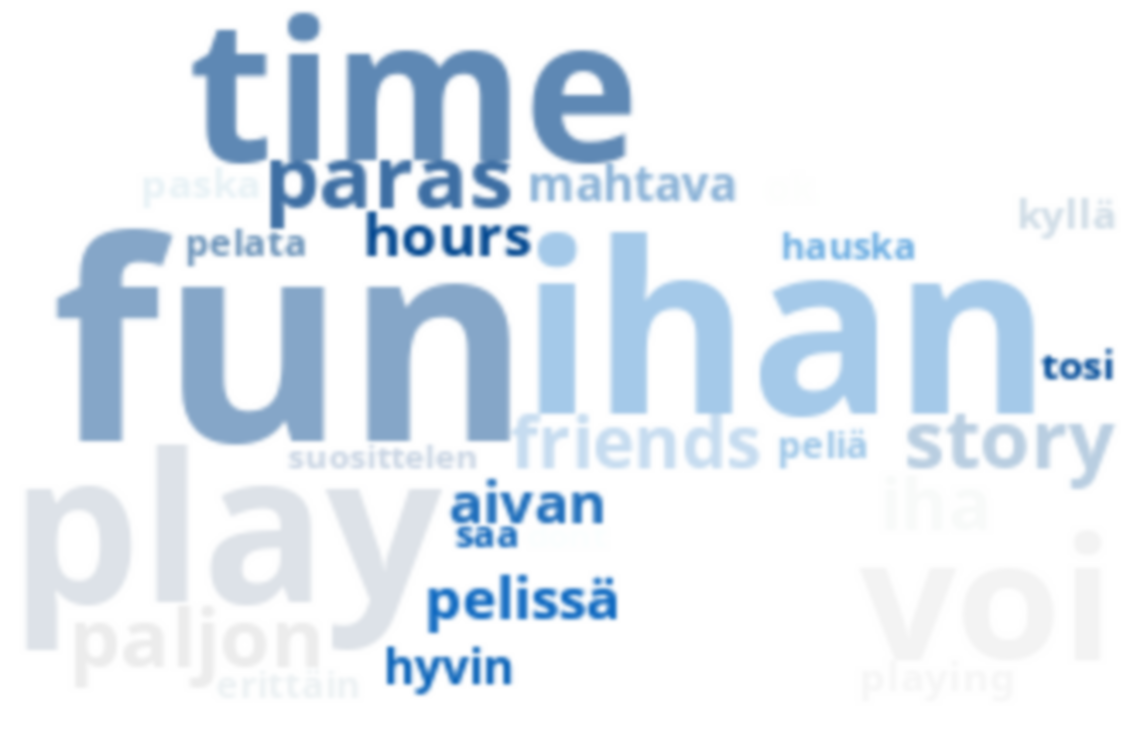

In [32]:
flag = Image.open(f"finnish.png")
mask = np.array(flag)

wc = WordCloud(font_path=lang_data.font_path.finnish, prefer_horizontal=1.0,
               background_color="rgb(255,255,255)", mask=mask, color_func=ImageColorGenerator(mask),
               min_font_size = 10,
               max_words=200, width=2560, height=1707).generate_from_frequencies(fi_text_counter) 

plt.figure(figsize=(20,20))

plt.imshow(wc, interpolation="bicubic")
plt.axis("off")
plt.show()